In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from animation_time_series import *
from src.constants import PARAMS_STATIC_CART, PARAMS_STATIC_COMB

Loading bolometer measurements for shot 36173
start fast time series
posterior covariance calculated, starting with fits:
  3.4851482909980405
Stopped renormalizing emission
finished
Animation 1
Animation complete, start writing to file ...
Complete
Animation 2
Animation complete, start writing to file ...
Complete
Animation 3
Animation complete, start writing to file ...
Complete
Animation 4
Animation complete, start writing to file ...
Complete


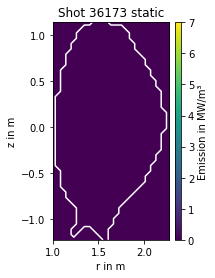

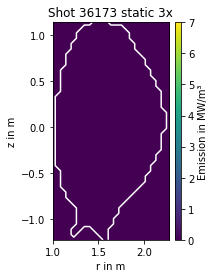

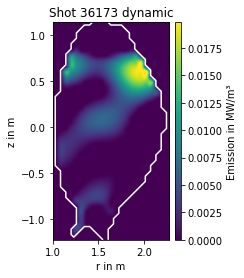

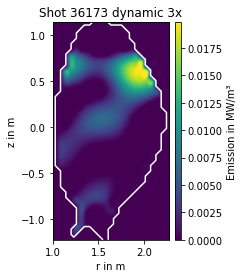

In [3]:
options = {"static_scale":[True, True, False, False], 
            "slowdown": [1, 3, 1, 3],
            "title": ["Shot 36173 static", "Shot 36173 static 3x", 
                        "Shot 36173 dynamic", "Shot 36173 dynamic 3x"],
             "file_name": ["test1_fast.mp4", "test2_fast.mp4",
                             "test3_fast.mp4", "test4_fast.mp4"]}
generate_time_series_animation(36173, 0, 10, save_options=options,
                                kernel_function="cartesian_var_z",
                                params=PARAMS_STATIC_CART, 
                                fast_mode=True)

Loading bolometer measurements for shot 36173
Load magnetic coordinates from file
Performing GPT for frame 500 of 501
Animation 1
Animation complete, start writing to file ...
Complete
Animation 2
Animation complete, start writing to file ...
Complete
Animation 3
Animation complete, start writing to file ...
Complete
Animation 4
Animation complete, start writing to file ...
Complete
Loading bolometer measurements for shot 36236
Load magnetic coordinates from file
Performing GPT for frame 500 of 501
Animation 1
Animation complete, start writing to file ...
Complete
Animation 2
Animation complete, start writing to file ...
Complete
Animation 3
Animation complete, start writing to file ...
Complete
Animation 4
Animation complete, start writing to file ...
Complete
Loading bolometer measurements for shot 36330
Load magnetic coordinates from file
Performing GPT for frame 500 of 501
Animation 1
Animation complete, start writing to file ...
Complete
Animation 2
Animation complete, start writi

/home/korbi/Nextcloud/Studium/gptomography-paper/code/src/plot_helper.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1)


Complete
Animation 2
Animation complete, start writing to file ...
Complete
Animation 3
Animation complete, start writing to file ...
Complete
Animation 4
Animation complete, start writing to file ...
Complete
Loading bolometer measurements for shot 36476
Load magnetic coordinates from file
Performing GPT for frame 500 of 501
Animation 1
Animation complete, start writing to file ...
Complete
Animation 2
Animation complete, start writing to file ...
Complete
Animation 3
Animation complete, start writing to file ...
Complete
Animation 4
Animation complete, start writing to file ...
Complete
Loading bolometer measurements for shot 36497
Load magnetic coordinates from file
Performing GPT for frame 382 of 501 WARNING: nan value(s) at frame 382
Performing GPT for frame 383 of 501

/home/korbi/Nextcloud/Studium/gptomography-paper/code/src/kernels.py:42: RuntimeWarning: invalid value encountered in remainder
  dtheta = (dtheta + np.pi) % (2*np.pi) - np.pi


Performing GPT for frame 384 of 501 WARNING: nan value(s) at frame 384
Performing GPT for frame 385 of 501 WARNING: nan value(s) at frame 385
Performing GPT for frame 386 of 501 WARNING: nan value(s) at frame 386
Performing GPT for frame 387 of 501 WARNING: nan value(s) at frame 387
Performing GPT for frame 388 of 501 WARNING: nan value(s) at frame 388
Performing GPT for frame 389 of 501 WARNING: nan value(s) at frame 389
Performing GPT for frame 390 of 501 WARNING: nan value(s) at frame 390
Performing GPT for frame 391 of 501 WARNING: nan value(s) at frame 391
Performing GPT for frame 392 of 501 WARNING: nan value(s) at frame 392
Performing GPT for frame 393 of 501 WARNING: nan value(s) at frame 393
Performing GPT for frame 394 of 501 WARNING: nan value(s) at frame 394
Performing GPT for frame 395 of 501 WARNING: nan value(s) at frame 395
Performing GPT for frame 396 of 501 WARNING: nan value(s) at frame 396
Performing GPT for frame 397 of 501 WARNING: nan value(s) at frame 397
Perfor

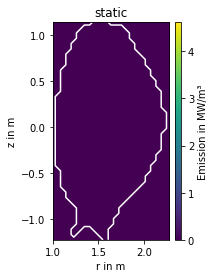

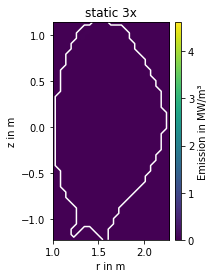

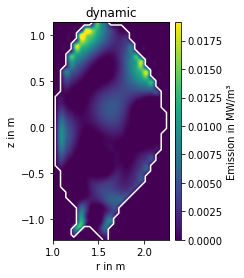

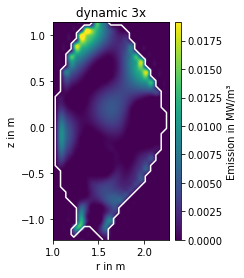

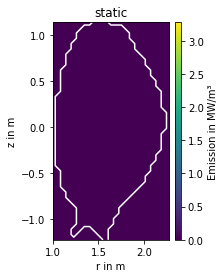

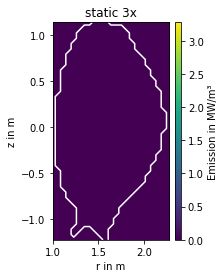

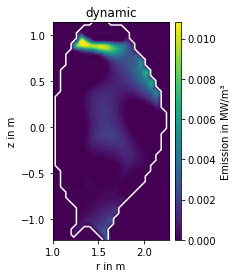

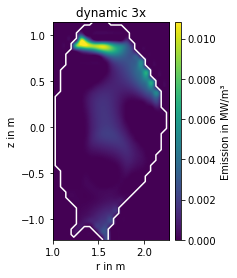

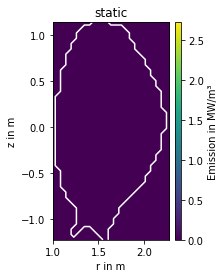

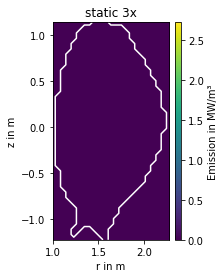

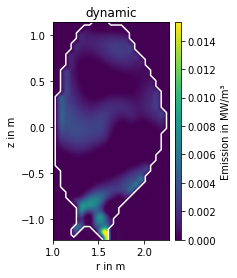

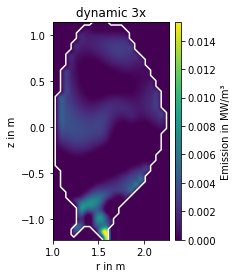

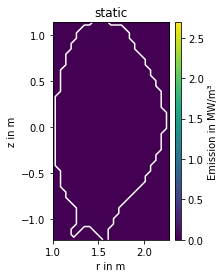

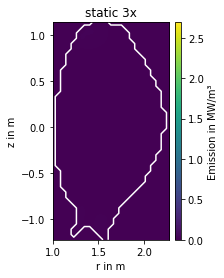

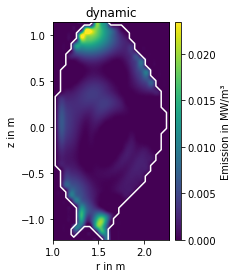

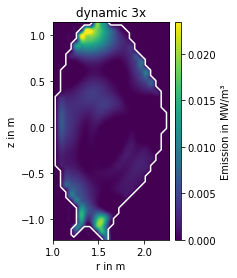

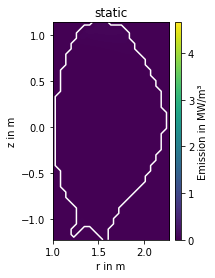

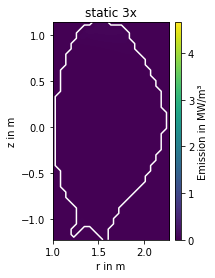

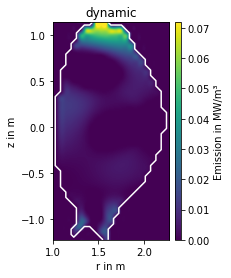

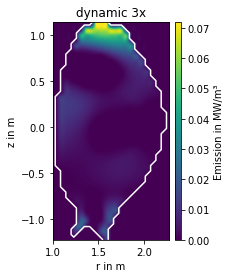

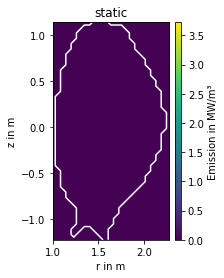

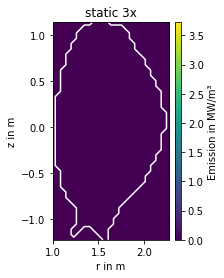

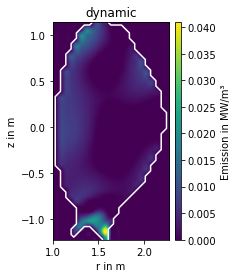

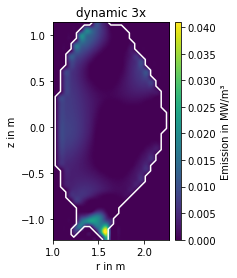

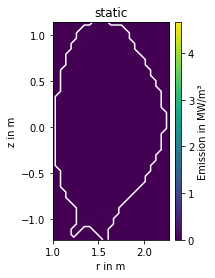

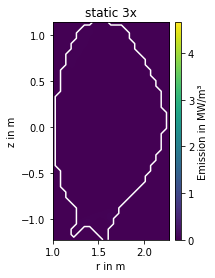

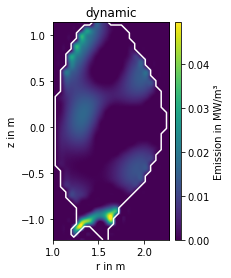

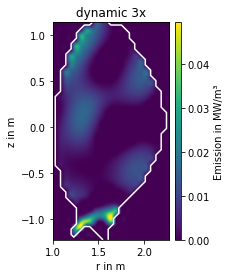

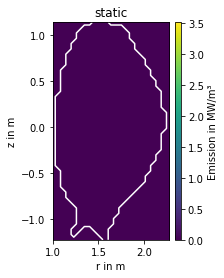

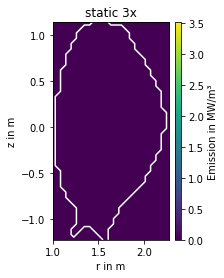

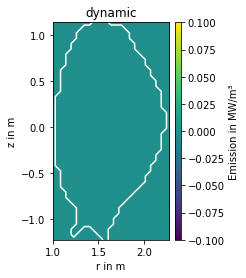

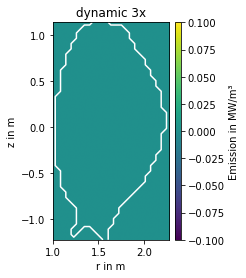

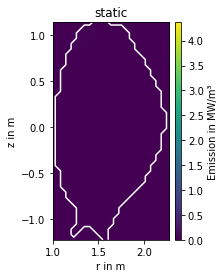

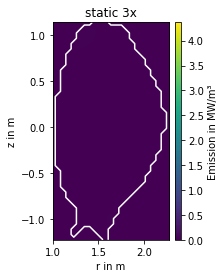

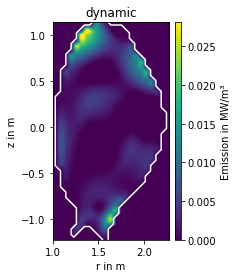

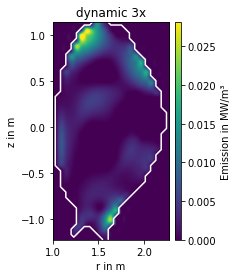

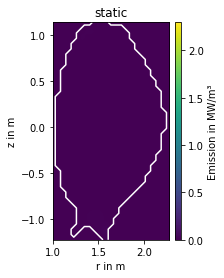

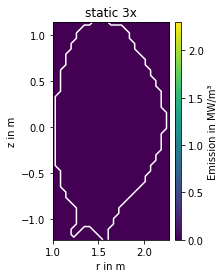

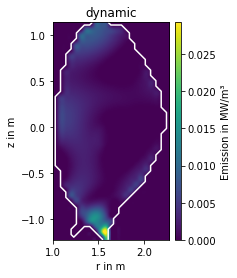

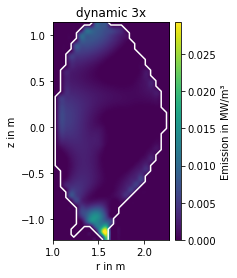

In [3]:
options = {"static_scale":[True, True, False, False], 
            "slowdown": [1, 3, 1, 3],
            "title": ["static", "static 3x", 
                        "dynamic", "dynamic 3x"]}
shots = [36173, 36236, 36330, 36354, 36448, 36464, 36476, 36497, 36747, 36774]
x_up = [False, True, False, False, False, False, False, False, False, False]

for i, shot in enumerate(shots):
    generate_time_series_animation(shot, 0, 10, 20,
                            PARAMS_STATIC_COMB,
                            save_options=options, 
                            kernel_function="combined_var_z",
                            x_point_up=x_up[i])

In [15]:
_,filtered_meas = filter_data(np.load("data/time_series/shot36173complete.npy"))
fits_test = np.load("results/time_series/36173/shot36173fits_0_10_20.npy")
mag_coords = np.load("data/time_series/shot36173mag_coords_0_10_20.npy")
print(mag_coords.shape)

Filtering data
(501, 2, 42, 23)


In [21]:
timepoints = (np.arange(fits_test.shape[0]) * (2500*0.02))
measurements = filtered_meas[timepoints.astype(int)]

In [11]:
from src.profiles import  get_profile_time_series
profiles = get_profile_time_series(fits_test, mag_coords)
print(profiles.shape)

(501, 2, 10)


Performing GPT for frame 500 of 501
Animation complete, start writing to file ...
Complete


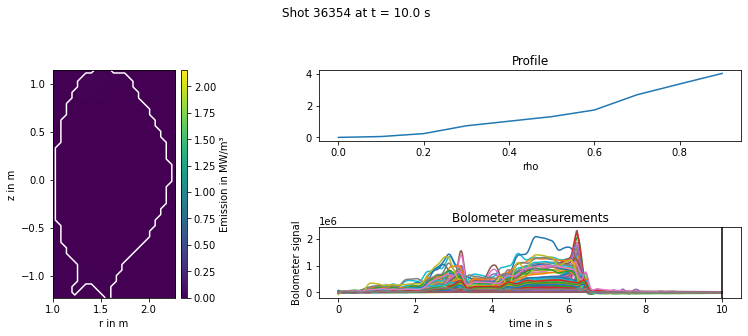

In [12]:
from src.plot_helper import save_fancy_plot_animation
from src.profiles import get_profile_time_series
shot = 36354

bolo_data = (np.load("data/time_series/shot{}bolo_data_0_10_20.npy"
                        .format(shot)))
frame_mag_coords = np.load("data/time_series/shot{}mag_coords_0_10_20.npy".format(shot))

frame_fits = calculate_timeseries(  bolo_data,PARAMS_STATIC_COMB,
                                            frame_mag_coords,
                                            "combined_var_z",
                                            x_point_up = False )

profiles = get_profile_time_series(frame_fits, frame_mag_coords)

save_fancy_plot_animation("results/time_series/fancy_plot{}.mp4".format(shot), frame_fits, profiles, bolo_data, shot, 20, slowdown=2)

Loading bolometer measurements for shot 36354
Filtering data
Load magnetic coordinates from file
Performing GPT for frame 500 of 501
Animation complete, start writing to file ...
Complete


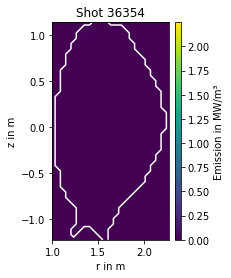

In [5]:
generate_time_series_animation(36354, 0, 10, kernel_function="combined_var_z", custom_save_path="/home/korbi/Schreibtisch")